In [4]:
%pylab inline
# Make editable in Illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd

adata = pd.read_csv("figure-tutorial-data.tab", sep="\t")

Populating the interactive namespace from numpy and matplotlib


(array([3.80000e+01, 3.26000e+02, 1.57560e+04, 1.36224e+05, 1.40260e+04,
        4.63300e+03, 4.82000e+02, 7.30000e+01, 1.30000e+01, 7.00000e+00]),
 array([-19., -13.,  -7.,  -1.,   5.,  11.,  17.,  23.,  29.,  35.,  41.]),
 <a list of 10 Patch objects>)

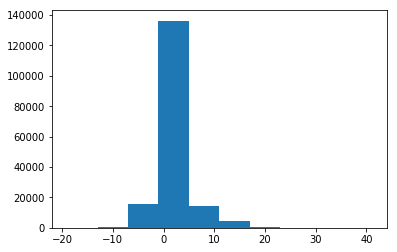

In [6]:
# Default - blah
plt.hist(adata["mutsize"])

171578


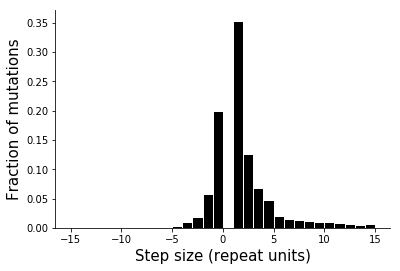

In [6]:
NUMSTEPS = 15 # show mutations +/- this number
bins = bins=np.arange(-1*NUMSTEPS,NUMSTEPS+1,1)

fig = plt.figure()
ax = fig.add_subplot(111)

plotdata = adata
print(plotdata.shape[0])
ax.hist(plotdata["mutsize"], color="black", edgecolor="white", bins=bins,
       weights=np.zeros_like(plotdata["mutsize"]) + 1. / plotdata["mutsize"].size);

ax.set_xlabel("Step size (repeat units)", size=15)
ax.set_ylabel("Fraction of mutations", size=15)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');

fig.savefig("tutorial-stepsize.pdf")

Period 1
MannwhitneyuResult(statistic=68346695.0, pvalue=4.0268488131390715e-10)
Num pat: 12654
Num mat: 11308
Period 2
MannwhitneyuResult(statistic=37948549.0, pvalue=5.5251755616526016e-238)
Num pat: 17308
Num mat: 5886
Period 3
MannwhitneyuResult(statistic=814108.5, pvalue=7.710652861310258e-12)
Num pat: 2048
Num mat: 896
Period 4
MannwhitneyuResult(statistic=5040744.0, pvalue=1.411427131221745e-68)
Num pat: 6137
Num mat: 1916
Period 5
MannwhitneyuResult(statistic=186497.0, pvalue=0.0023179448637239263)
Num pat: 938
Num mat: 425
1.0
2.0
MannwhitneyuResult(statistic=316456830.0, pvalue=0.0)


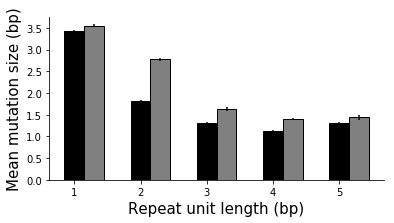

In [7]:
# Redo based on POO
periods = range(1, 6)
mean_steps_mother = []
mean_steps_father = []
stderr_steps_mother = []
stderr_steps_father = []

MAXSTEP = 25 # don't count anything outrageous

for period in periods:
    xdata1 = adata[(adata["period"]==period) & (adata["poocase"]==2)]["mutsize"]
    xdata1 = xdata1[abs(xdata1)<=MAXSTEP]
    xdata2 = adata[(adata["period"]==period) & (adata["poocase"]==3)]["mutsize"]
    xdata2 = xdata2[abs(xdata2)<=MAXSTEP]

    xdata1 = abs(xdata1)
    xdata2 = abs(xdata2)
    
    mean_steps_father.append(np.mean(xdata1))
    mean_steps_mother.append(np.mean(xdata2))
    stderr_steps_father.append(np.sqrt(np.var(xdata1)/len(xdata1)))
    stderr_steps_mother.append(np.sqrt(np.var(xdata2)/len(xdata2)))
    
    print("Period %s"%period)
    try:
        print(scipy.stats.mannwhitneyu(xdata1, xdata2, alternative="less"))
        print("Num pat: %s"%len(xdata1))
        print("Num mat: %s"%len(xdata2))
    except: pass

# overall
xdata1 = adata[ (adata["poocase"]==2)]["mutsize"]
xdata1 = xdata1[abs(xdata1)<=MAXSTEP]
xdata2 = adata[ (adata["poocase"]==3)]["mutsize"]
xdata2 = xdata2[abs(xdata2)<=MAXSTEP]
xdata1 = abs(xdata1)
xdata2 = abs(xdata2)
print(np.median(xdata1))
print(np.median(xdata2))
print(scipy.stats.mannwhitneyu(xdata1, xdata2, alternative="less"))

w = 0.3
fig = plt.figure()
fig.set_size_inches((6, 3))
ax = fig.add_subplot(111)
ax.bar(periods, mean_steps_father, yerr=stderr_steps_father, width=w, color="black", edgecolor="black");
ax.bar([item+w for item in periods], mean_steps_mother, yerr=stderr_steps_mother, width=w, color="gray", edgecolor="black");
ax.set_xlabel("Repeat unit length (bp)", size=15)
ax.set_ylabel("Mean mutation size (bp)", size=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');

fig.savefig("tutorial-parentorigin.pdf")
